In [17]:
from frame_special import *

In [18]:
# 加载原始数据
train_arrays,train_labels = load_data()
test_arrays = load_test()

Load test data: 100%|██████████| 300000/300000 [00:26<00:00, 11397.61it/s]


In [20]:
# 构造训练数据迭代器
batch_size = 64
train_dataset = TrainDataset(train_arrays,train_labels)
train_iter = data.DataLoader(train_dataset,batch_size,shuffle = True)

load 50000 images!


In [21]:
# 构造测试数据迭代器
test_dataset = TestDataset(test_arrays)
test_iter = data.DataLoader(test_dataset,batch_size,shuffle = False)

load 300000 images!


In [22]:
# 定义网络
net = nn.Sequential(
    nn.Conv2d(3,10,17),
    nn.ReLU(),
    nn.Conv2d(10,10,9),
    nn.ReLU(),
    nn.Conv2d(10,10,5),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(160,10),
    nn.Softmax(dim = 1)
)

# 定义损失函数
loss_fn = nn.CrossEntropyLoss()

# 定义超参数
num_epochs = 30
lr = 3e-5

In [23]:
loss_plt = train(net,train_iter,lr,num_epochs,loss_fn)

Epoch [30/30]: 100%|██████████| 782/782 [00:07<00:00, 108.03it/s, LOSS=0.0322]


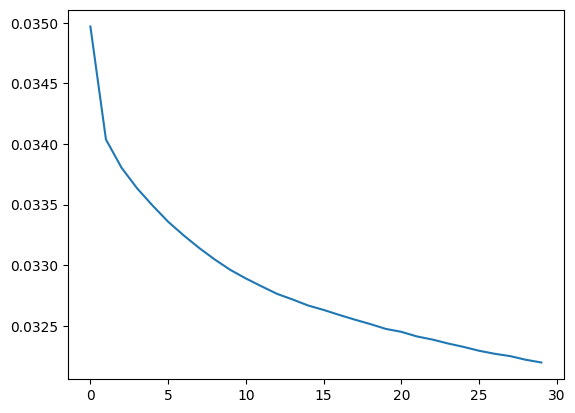

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(loss_plt)),loss_plt)
plt.show()

In [25]:
torch.save(net,"models/temp.pt")
print("model save successfully!")

model save successfully!


In [ ]:
net = torch.load('models/temp.pt',weights_only = False)
accurancy = count_accurancy(net,train_iter)
print(f"acc in train dataset:{accurancy}")

Eval:   0%|          | 0/782 [00:00<?, ?it/s]

Eval: 100%|██████████| 782/782 [00:04<00:00, 161.39it/s]

acc in train dataset:0.4241
